# Модель борьбы популяций
## Введение
В мире животных существует постоянная борьба за выживание, где популяции хищников и жертв воздействуют друг на друга, создавая сложные динамические взаимосвязи. Одним из уникальных способов моделирования этой взаимодействия является модель хищник-жертва, которая позволяет понять динамику этих двух популяций в природной среде.

## Задача
Модель хищник-жертва представляет собой математическое описание отношений между популяциями хищников и жертв в экосистеме. С помощью построенной математической модели изучим, как изменения в численности одной популяции влияют на другую.

## Построение модели
Обозначим количество жертв числом $N$, а количество хищников -- $M$. И предположим, что они зависят только от времени. То есть
$$ 
    N = N(t),  \\
    M = M(t).
$$

Рассмотрим сначала ситуацию, когда между видами отсутствует взаимодействие, то есть хищники не истребляют жертв.

Жертвы -- пусть они будут травоядными -- поедают траву, и сытые размножаются. А хищники, остаются голодными и со временем умирают.

Математическая модель без взаимодействия:
$$
    \begin{cases}
        \frac{dN}{dt} = aN, \\
        \frac{dM}{dt} = -bM,
    \end{cases}
$$

где $a$ -- коэффициент прироста жертв, $b$ -- коэффициент смертности хищников.

При отсутствии влияния видов друг на друга хищники бы с течением времени полностью бы исчезли, в то время как жертвы продолжали бесконечно плодиться.

Рассмотрим теперь влияние видов друг на друга в зависимости от их численности.

В процессе борьбы один хищников убивает $c$ жертв, из-за численность вторых сокращается на $cM$. В то же время, хищники могут съесть в настоящий момент лишь $dN$ от настоящего количества жертв, в следствие чего у хищников происходит прирост популяции на $dN$.

$$
    \begin{cases}
        \frac{dN}{dt} = \left(a -cM \right)N, \\
        \frac{dM}{dt} = \left(-b + dN \right)M,
    \end{cases}
$$

Добавляя начальные условия в начале наблюданий, полноценно строим математическую модель.
$$
    \begin{cases}
        \frac{dN}{dt} = \left(a -cM \right)N, \\
        \frac{dM}{dt} = \left(-b + dN \right)M, \\
        N(0) = N_0, \\
        M(0) = M_0.
    \end{cases}
$$

In [1]:
import matplotlib.pyplot as plt 
import numpy as np

h = 0.01
t = np.arange(0, 2000, h)
u0 = np.array([3, 4])
a = 7
b = 6
c = 0.7
d = 0.5

In [2]:
def f(t, u_orig):
    u = u_orig.copy()
    return np.array([
        (a - c * u[1]) * u[0],
        (-b + d * u[0]) * u[1]
    ])

def runge_kutta(h, u0, t):
    x = [u0[0]]
    y = [u0[1]]
    u = u0
    for i in range(len(t) - 1):
        k0 = f(t[i], u)
        k1 = f(t[i] + h/2, u + h/2*k0)
        k2 = f(t[i] + h/2, u + h/2*k1)
        k3 = f(t[i] + h,u + h*k2)
        u = u + h/6 * (k0 + 2*k1 + 2*k2 + k3)

        x.append(u[0])
        y.append(u[1])
        
    return x, y

In [3]:
colors = ('crimson', 'orangered', 'y', 'lime', 'deepskyblue', 'royalblue')

In [4]:
x, y = runge_kutta(h, u0, t)

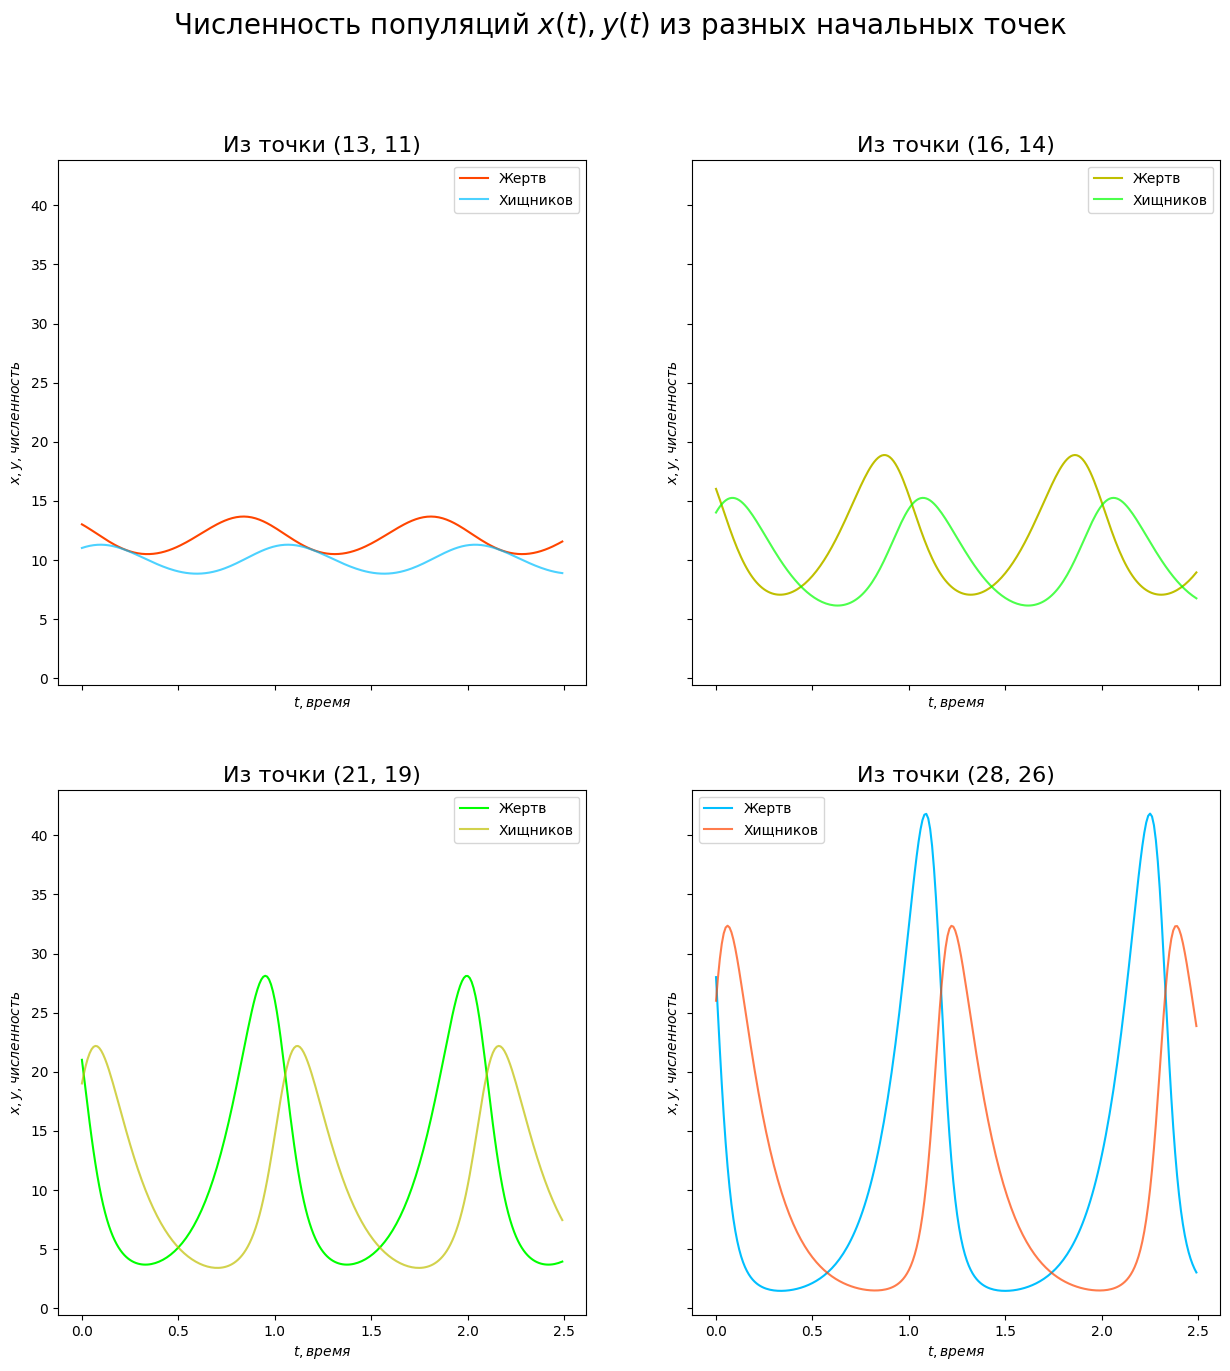

In [14]:
fig, axs = plt.subplots(2, 2, figsize=(15, 15), sharex=True, sharey=True)
for i in range(1, 5):
    k = (i - 1) // 2
    j = (i - 1) % 2
    u0 = np.array([int(b/d) + i**2, int(a/c) + i**2])
    x, y = runge_kutta(h, u0, t)
    axs[k, j].plot(t[:250], x[:250], color=colors[i])
    axs[k, j].plot(t[:250], y[:250], color=colors[-1 - i], alpha=0.7)
    axs[k, j].set_xlabel('$t, время$')
    axs[k, j].set_ylabel('$x, y, численность$')
    axs[k, j].set_title(f'Из точки {u0[0], u0[1]}', fontsize=16)
    axs[k, j].legend(['Жертв', 'Хищников']);
fig.suptitle('Численность популяций $x(t), y(t)$ из разных начальных точек', fontsize=20)
plt.show()
fig.savefig('population_plots.png')

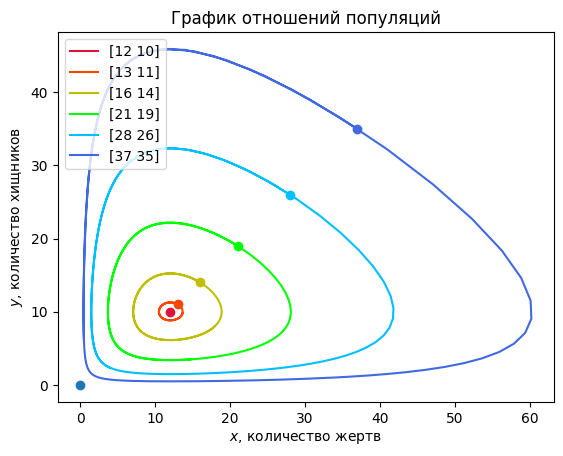

In [7]:
legend = []
for i in range(6):
    u0 = np.array([int(b/d) + i**2, int(a/c) + i**2])
    x, y = runge_kutta(h, u0, t)
    plt.plot(x[:180], y[:180], color=colors[i], label=u0)
    plt.plot(u0[0], u0[1], 'o', color=colors[i])
    legend.append(u0)
plt.plot(0, 0, 'o')
plt.xlabel('$x$, количество жертв')
plt.ylabel('$y$, количество хищников')
plt.legend(loc='upper left')
plt.title('График отношений популяций');
plt.savefig('population_interaction.png')